<a href="https://colab.research.google.com/github/ETorresSacha/clases-MI/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Descripción de variables
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival - Survival (0 = No; 1 = Yes)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat

body - Body Identification Number

home.dest - Home/Destination

Pclass es un aproximado del estatus socioeconómico

Age es en años

In [74]:
data  = pd.read_csv('/content/sample_data/titanic3.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
data.shape

(1309, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
data['survived'].value_counts()

,count
survived,
0,809
1,500


In [12]:
data['sex'].value_counts()

,count
sex,
male,843
female,466


In [25]:
data[['sex','survived']].groupby('sex').mean()

,survived
sex,
female,0.727468
male,0.190985


In [19]:
data['pclass'].value_counts()

,count
pclass,
3,709
1,323
2,277


In [26]:
data[['pclass','survived']].groupby('pclass').mean()

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [31]:
data.groupby('pclass')['sex'].value_counts()

pclass  sex   
1       male      179
        female    144
2       male      171
        female    106
3       male      493
        female    216
Name: count, dtype: int64

In [38]:
 data[['sibsp','survived']].groupby('sibsp').mean().sort_values(by = 'survived',ascending = False)

,survived
sibsp,
1,0.510972
2,0.452381
0,0.346801
3,0.300000
4,0.136364
5,0.000000
8,0.000000


In [42]:
data[['parch','survived']].groupby('parch').mean().sort_values(by = 'survived',ascending = False)

,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000


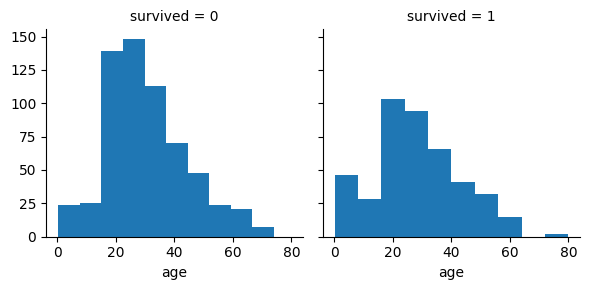

In [43]:
hist_age = sns.FacetGrid(data,col ='survived')
hist_age.map(plt.hist,'age', bins = 10)

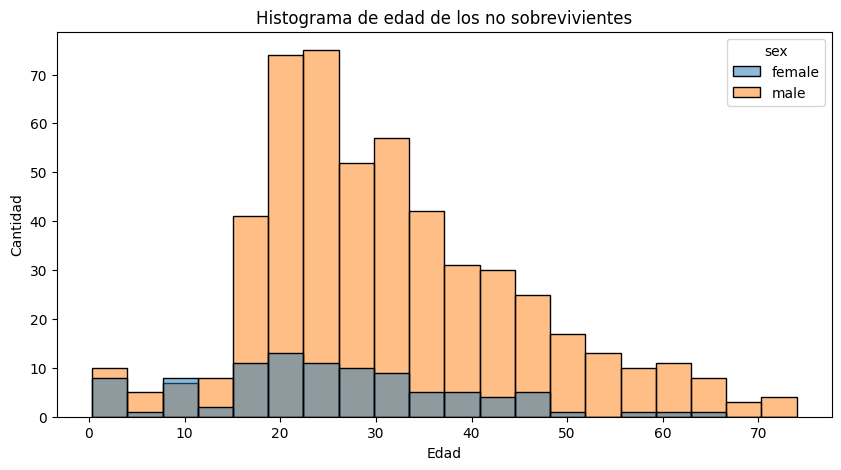

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['survived'] == 0], x = 'age', hue='sex',bins=20,label='No sobrevivio')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los no sobrevivientes')
plt.show()

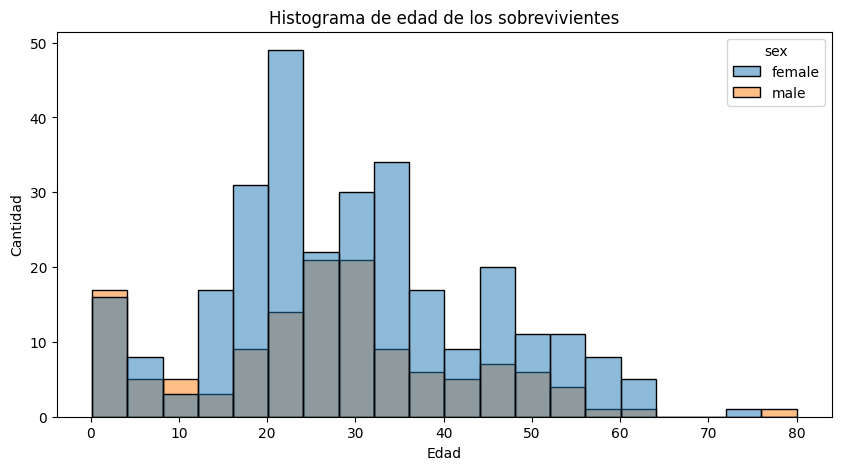

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['survived'] == 1], x = 'age', hue='sex',bins=20,label='sobrevivio')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los sobrevivientes')
plt.show()

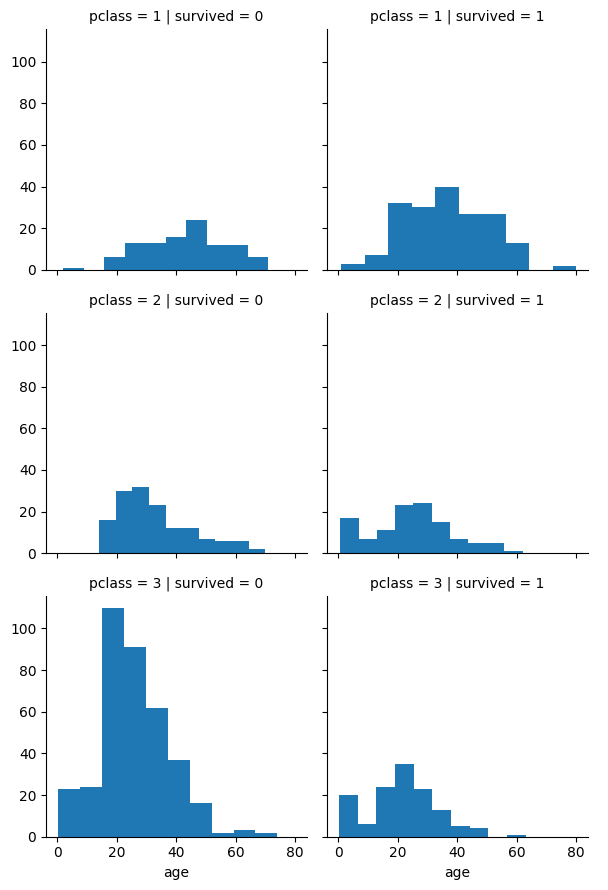

In [55]:
grid = sns.FacetGrid(data,col='survived', row='pclass')
grid.map(plt.hist,'age',bins = 10)
grid.add_legend()

### Convertir las varibles categoricas

oneHotEncoder

In [65]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
ohe = one_hot_encoder.fit_transform(data[['sex']])
ohe=ohe.astype(int)

In [66]:
one_hot_encoder_df = pd.DataFrame(ohe.toarray(),columns=one_hot_encoder.get_feature_names_out(['sex']))
one_hot_encoder_df

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [75]:
# concadenar los datos de 'sex' al conjunto data
data =pd.concat([data,one_hot_encoder_df], axis=1)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


In [76]:
# Eliminamos la columna 'sex'
data.drop('sex',axis=1,inplace=True)
data

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   age         1046 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   object 
 7   fare        1308 non-null   float64
 8   cabin       295 non-null    object 
 9   embarked    1307 non-null   object 
 10  boat        486 non-null    object 
 11  body        121 non-null    float64
 12  home.dest   745 non-null    object 
 13  sex_female  1309 non-null   int64  
 14  sex_male    1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [78]:
print(data.columns)

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'sex_female',
       'sex_male'],
      dtype='object')


In [80]:
# Eliminamos las columnas que queremos trabajar
data.drop(['name','ticket','cabin','embarked','boat','body','home.dest'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1046 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   sex_female  1309 non-null   int64  
 7   sex_male    1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


### outlier

<function matplotlib.pyplot.show(close=None, block=None)>

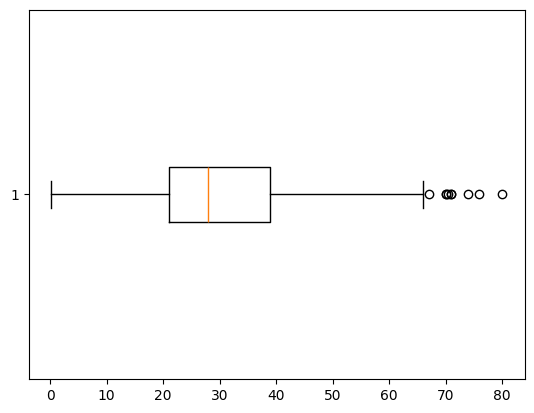

In [82]:
plt.boxplot(data['age'].dropna(),vert=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

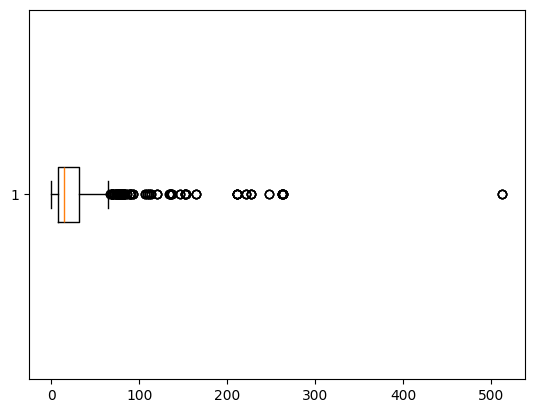

In [83]:
plt.boxplot(data['fare'].dropna(),vert=False)
plt.show

In [84]:
# Completar los datos faltantes
data_copy = data.copy()

In [87]:
data_copy['age'].fillna(data_copy['age'].mean(), inplace = True)
data_copy['fare'].fillna(data_copy['fare'].median(), inplace = True)

/tmp/ipython-input-87-789939628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['age'].fillna(data_copy['age'].mean(), inplace = True)
/tmp/ipython-input-87-789939628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [88]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   int64  
 7   sex_male    1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


# PLICANDO LOS ALGORITMOS DE MACHING LEARNING

In [94]:
from sklearn.model_selection import train_test_split

In [97]:
x=data_copy.drop(['survived'],axis=1).values
y = data_copy['survived'].values
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [98]:
print(data.shape)
print(x_train.shape)
print(x_test.shape)

(1309, 8)
(1047, 7)
(262, 7)


In [99]:
# REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,max_iter=400)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=400, random_state=0)

In [100]:
y_pred = log_reg.predict(x_test)

In [101]:
print('Reales: ',y_test[:10],'Predicción: ',y_pred[:10])

Reales:  [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[127,  17],
       [ 43,  75]])

In [103]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [104]:
print('Presición', precision_score(y_test,y_pred))
print('Memoria: ',recall_score(y_test,y_pred))
print('F1_score: ',f1_score(y_test,y_pred) )
print('Score: ', round(log_reg.score(x_train,y_train)*100,2))

Presición 0.8152173913043478
Memoria:  0.635593220338983
F1_score:  0.7142857142857143
Score:  79.47


In [105]:
# ARBOL DE DESICION
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred = cls.predict(x_test)

In [107]:
print('Reales: ',y_test[:10],'Predicción: ',y_pred[:10])

Reales:  [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [108]:
confusion_matrix(y_test,y_pred)

array([[124,  20],
       [ 37,  81]])

In [109]:
print('Presición', precision_score(y_test,y_pred))
print('Memoria: ',recall_score(y_test,y_pred))
print('F1_score: ',f1_score(y_test,y_pred) )
print('Score: ', round(cls.score(x_train,y_train)*100,2))

Presición 0.801980198019802
Memoria:  0.6864406779661016
F1_score:  0.7397260273972602
Score:  97.04


In [110]:
# BOSQUE ALEATORIO
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
print('Reales: ',y_test[:10],'Predicción: ',y_pred[:10])